In [296]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [297]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn import linear_model, metrics, model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [305]:
df_prod_test = pd.read_csv("Datos alta precisión test.csv")
df_prod_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LOTE                          56 non-null     int64  
 1   Orden en el encadenado        56 non-null     int64  
 2   LOTE parental                 22 non-null     float64
 3   ID Bioreactor                 56 non-null     int64  
 4   Fecha/hora inicio             56 non-null     object 
 5   Fecha/hora fin                56 non-null     object 
 6   Volumen de inóculo utilizado  43 non-null     float64
 7   Turbidez inicio cultivo       55 non-null     float64
 8   Turbidez fin cultivo          55 non-null     float64
 9   Viabilidad inicial cultivo    55 non-null     float64
 10  Viabilidad final cultivo      55 non-null     float64
 11  ID Centrífuga                 56 non-null     int64  
 12  Centrifugación 1 turbidez     56 non-null     float64
 13  Centrif

In [306]:
df_prod_test["Fecha/hora inicio"] = pd.to_datetime(df_prod_test["Fecha/hora inicio"])
df_prod_test["Fecha/hora fin"] = pd.to_datetime(df_prod_test["Fecha/hora fin"])

In [299]:
# pd.set_option('display.max_rows', 180)

In [300]:
df_prod_fin = pd.read_csv("CSV Entrega\Datos precisión completos.csv")
df_prod_fin

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2
0,23019,1,0,14615,2023-03-21 07:30:00,2023-03-23 06:30:00,82.4,17.3,91.2,184000000.0,17825,0.0,0.0,1747.9,6.0
1,23020,1,0,14616,2023-03-21 07:30:00,2023-03-23 06:30:00,80.4,18.8,91.2,182000000.0,14246,0.0,0.0,1676.2,6.6
2,23021,1,0,13170,2023-03-22 07:30:00,2023-03-24 06:30:00,66.4,16.2,86.4,248000000.0,17825,0.0,0.0,1928.5,8.1
3,23022,1,0,14614,2023-03-22 07:30:00,2023-03-24 06:30:00,85.6,18.5,83.2,230000000.0,12912,0.0,0.0,1782.8,5.9
4,23023,1,0,14615,2023-03-28 07:27:00,2023-03-30 10:00:00,77.6,17.1,74.4,133000000.0,17825,26.6,20.9,1861.8,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,24049,1,0,14617,2024-03-16 09:22:00,2024-03-18 08:23:00,84.0,19.0,73.0,165000000.0,12912,31.0,17.0,1342.8,4.9
148,24050,1,0,14614,2024-03-23 08:57:00,2024-03-25 08:28:00,84.0,18.0,68.0,152000000.0,6379,29.0,27.0,1422.8,3.7
149,24051,1,0,13169,2024-03-23 08:57:00,2024-03-25 08:33:00,84.0,18.0,81.0,161000000.0,12912,33.0,19.0,1486.6,5.5
150,24052,2,24050,14614,2024-03-25 13:28:00,2024-03-27 08:51:00,86.0,17.0,69.0,148000000.0,14246,24.0,18.0,1857.3,6.0


In [301]:
df_prod_fin["Fecha/hora inicio"] = pd.to_datetime(df_prod_fin["Fecha/hora inicio"])
df_prod_fin["Fecha/hora fin"] = pd.to_datetime(df_prod_fin["Fecha/hora fin"])


In [302]:
# df_original = df_prod_fin

# # Generar 1000 filas adicionales mediante resampleo con reemplazo
# num_filas_nuevas = 1000
# df_nuevas_filas = df_original.sample(n=num_filas_nuevas, replace=True, random_state=42).reset_index(drop=True)

# # Concatenar las filas originales con las nuevas
# df_final = pd.concat([df_original, df_nuevas_filas], ignore_index=True)

# # Mostrar la forma del DataFrame final para confirmar que tiene las nuevas filas
# print(f"Filas originales: {df_original.shape[0]}")
# print(f"Nuevas filas generadas: {df_nuevas_filas.shape[0]}")
# print(f"Total de filas en el DataFrame final: {df_final.shape[0]}")

# # Ver las primeras filas del DataFrame final
# df_final.head()

In [9]:
df_prod_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   LOTE                          152 non-null    int64         
 1   Orden en el encadenado        152 non-null    int64         
 2   LOTE parental                 152 non-null    int64         
 3   ID Bioreactor                 152 non-null    int64         
 4   Fecha/hora inicio             152 non-null    datetime64[ns]
 5   Fecha/hora fin                152 non-null    datetime64[ns]
 6   Volumen de inóculo utilizado  152 non-null    float64       
 7   Turbidez inicio cultivo       152 non-null    float64       
 8   Turbidez fin cultivo          152 non-null    float64       
 9   Viabilidad final cultivo      152 non-null    float64       
 10  ID Centrífuga                 152 non-null    int64         
 11  Centrifugación 1 turbidez     15

In [10]:
df_cin_fin = pd.read_csv("Datos Cineticos Cultivo Final")
df_cin_fin

,Lote,Fecha,Turbidez,Viabilidad,Glucosa g/L
0,23019,2023-03-21 07:30:00,17.28,8330000.0,1.740
1,23019,2023-03-21 11:00:00,17.28,14000000.0,1.970
2,23019,2023-03-21 14:00:00,18.40,16900000.0,1.920
3,23019,2023-03-21 18:00:00,19.76,24700000.0,1.880
4,23019,2023-03-22 07:00:00,39.12,100000000.0,1.570
...,...,...,...,...,...
1836,24110,2024-07-04 15:30:00,58.40,80500000.0,1.584
1837,24110,2024-07-04 19:30:00,69.76,102000000.0,1.248
1838,24110,2024-07-05 06:30:00,100.80,153000000.0,0.600
1839,24110,2024-07-05 08:00:00,104.80,151000000.0,0.520


In [11]:
df_cin_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1841 entries, 0 to 1840
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Lote         1841 non-null   int64  
 1   Fecha        1840 non-null   object 
 2   Turbidez     1831 non-null   float64
 3   Viabilidad   1839 non-null   float64
 4   Glucosa g/L  1522 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 72.0+ KB


In [12]:
# Crear las nuevas columnas para los valores iniciales y finales de glucosa
df_cin_fin['Glucosa inicial'] = df_cin_fin.groupby('Lote')['Glucosa g/L'].transform('first')
df_cin_fin['Glucosa final'] = df_cin_fin.groupby('Lote')['Glucosa g/L'].transform('last')

# Mostrar el resultado
df_cin_fin


,Lote,Fecha,Turbidez,Viabilidad,Glucosa g/L,Glucosa inicial,Glucosa final
0,23019,2023-03-21 07:30:00,17.28,8330000.0,1.740,1.740,0.210
1,23019,2023-03-21 11:00:00,17.28,14000000.0,1.970,1.740,0.210
2,23019,2023-03-21 14:00:00,18.40,16900000.0,1.920,1.740,0.210
3,23019,2023-03-21 18:00:00,19.76,24700000.0,1.880,1.740,0.210
4,23019,2023-03-22 07:00:00,39.12,100000000.0,1.570,1.740,0.210
...,...,...,...,...,...,...,...
1836,24110,2024-07-04 15:30:00,58.40,80500000.0,1.584,1.792,0.592
1837,24110,2024-07-04 19:30:00,69.76,102000000.0,1.248,1.792,0.592
1838,24110,2024-07-05 06:30:00,100.80,153000000.0,0.600,1.792,0.592
1839,24110,2024-07-05 08:00:00,104.80,151000000.0,0.520,1.792,0.592


In [13]:
df_cin_fin = df_cin_fin.drop_duplicates(subset='Lote')
df_cin_fin

,Lote,Fecha,Turbidez,Viabilidad,Glucosa g/L,Glucosa inicial,Glucosa final
0,23019,2023-03-21 07:30:00,17.28,8330000.0,1.740,1.740,0.210
10,23020,2023-03-21 07:30:00,18.80,7460000.0,1.750,1.750,0.310
20,23021,2023-03-22 07:30:00,16.16,8910000.0,1.730,1.730,0.280
31,23022,2023-03-22 07:30:00,18.48,7850000.0,1.730,1.730,0.370
42,23023,2023-03-28 08:00:00,17.12,5800000.0,1.800,1.800,0.460
...,...,...,...,...,...,...,...
1812,24104,2024-07-03 20:00:00,59.12,75700000.0,1.552,1.552,0.816
1815,24106,2024-07-01 13:15:00,23.60,10000000.0,1.944,1.944,0.560
1819,24107,2024-07-01 14:00:00,21.76,10400000.0,1.816,1.816,0.584
1823,24109,2024-07-03 16:00:00,23.84,15100000.0,1.832,1.832,0.440


In [14]:
df_prod_fin_cin_fin = pd.merge(df_prod_fin, df_cin_fin, left_on="LOTE",right_on="Lote", how="left")
df_prod_fin_cin_fin = df_prod_fin_cin_fin.drop(["Lote","Fecha","Turbidez","Viabilidad"],axis=1)
df_prod_fin_cin_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   LOTE                          152 non-null    int64         
 1   Orden en el encadenado        152 non-null    int64         
 2   LOTE parental                 152 non-null    int64         
 3   ID Bioreactor                 152 non-null    int64         
 4   Fecha/hora inicio             152 non-null    datetime64[ns]
 5   Fecha/hora fin                152 non-null    datetime64[ns]
 6   Volumen de inóculo utilizado  152 non-null    float64       
 7   Turbidez inicio cultivo       152 non-null    float64       
 8   Turbidez fin cultivo          152 non-null    float64       
 9   Viabilidad final cultivo      152 non-null    float64       
 10  ID Centrífuga                 152 non-null    int64         
 11  Centrifugación 1 turbidez     15

In [15]:
df_prod_fin_cin_fin

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Glucosa g/L,Glucosa inicial,Glucosa final
0,23019,1,0,14615,2023-03-21 07:30:00,2023-03-23 06:30:00,82.4,17.3,91.2,184000000.0,17825,0.0,0.0,1747.9,6.0,1.740,1.740,0.210
1,23020,1,0,14616,2023-03-21 07:30:00,2023-03-23 06:30:00,80.4,18.8,91.2,182000000.0,14246,0.0,0.0,1676.2,6.6,1.750,1.750,0.310
2,23021,1,0,13170,2023-03-22 07:30:00,2023-03-24 06:30:00,66.4,16.2,86.4,248000000.0,17825,0.0,0.0,1928.5,8.1,1.730,1.730,0.280
3,23022,1,0,14614,2023-03-22 07:30:00,2023-03-24 06:30:00,85.6,18.5,83.2,230000000.0,12912,0.0,0.0,1782.8,5.9,1.730,1.730,0.370
4,23023,1,0,14615,2023-03-28 07:27:00,2023-03-30 10:00:00,77.6,17.1,74.4,133000000.0,17825,26.6,20.9,1861.8,3.0,1.800,1.800,0.460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,24049,1,0,14617,2024-03-16 09:22:00,2024-03-18 08:23:00,84.0,19.0,73.0,165000000.0,12912,31.0,17.0,1342.8,4.9,1.704,1.704,0.808
148,24050,1,0,14614,2024-03-23 08:57:00,2024-03-25 08:28:00,84.0,18.0,68.0,152000000.0,6379,29.0,27.0,1422.8,3.7,1.880,1.880,0.928
149,24051,1,0,13169,2024-03-23 08:57:00,2024-03-25 08:33:00,84.0,18.0,81.0,161000000.0,12912,33.0,19.0,1486.6,5.5,1.512,1.512,0.720
150,24052,2,24050,14614,2024-03-25 13:28:00,2024-03-27 08:51:00,86.0,17.0,69.0,148000000.0,14246,24.0,18.0,1857.3,6.0,1.880,1.880,1.144


In [16]:
df_cin_ino = pd.read_csv("Datos Cineticos Inoculo")
df_cin_ino

,Lote,Fecha,Turbidez,Viabilidad
0,23019,2023-03-21 06:30:00,32.8,134000000.0
1,23020,2023-03-21 06:30:00,32.8,134000000.0
2,23021,2023-03-22 06:30:00,27.8,115000000.0
3,23022,2023-03-22 06:30:00,27.8,115000000.0
4,23023,2023-03-27 07:30:00,18.2,10900000.0
...,...,...,...,...
705,24111,2024-07-06 06:15:00,27.6,80400000.0
706,24111,2024-07-06 07:00:00,28.1,92800000.0
707,24108,2024-07-05 07:15:00,17.5,2170000.0
708,24108,2024-07-06 06:15:00,27.6,80400000.0


In [17]:
df_cin_ino['Turbidez inóculo inicial'] = df_cin_ino.groupby('Lote')['Turbidez'].transform('first')
df_cin_ino['Turbidez inóculo final'] = df_cin_ino.groupby('Lote')['Turbidez'].transform('last')
df_cin_ino = df_cin_ino.drop_duplicates(subset="Lote")
df_cin_ino.info()


<class 'pandas.core.frame.DataFrame'>
Index: 169 entries, 0 to 707
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Lote                      169 non-null    int64  
 1   Fecha                     169 non-null    object 
 2   Turbidez                  169 non-null    float64
 3   Viabilidad                169 non-null    float64
 4   Turbidez inóculo inicial  169 non-null    float64
 5   Turbidez inóculo final    169 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.2+ KB


In [18]:
df_prod_fin_cin_fin_cin_ino = pd.merge(df_prod_fin_cin_fin, df_cin_ino, left_on="LOTE",right_on="Lote", how='left')
df_prod_fin_cin_fin_cin_ino.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   LOTE                          152 non-null    int64         
 1   Orden en el encadenado        152 non-null    int64         
 2   LOTE parental                 152 non-null    int64         
 3   ID Bioreactor                 152 non-null    int64         
 4   Fecha/hora inicio             152 non-null    datetime64[ns]
 5   Fecha/hora fin                152 non-null    datetime64[ns]
 6   Volumen de inóculo utilizado  152 non-null    float64       
 7   Turbidez inicio cultivo       152 non-null    float64       
 8   Turbidez fin cultivo          152 non-null    float64       
 9   Viabilidad final cultivo      152 non-null    float64       
 10  ID Centrífuga                 152 non-null    int64         
 11  Centrifugación 1 turbidez     15

In [20]:
df_prod_fin_cin_fin_cin_ino = df_prod_fin_cin_fin_cin_ino.drop(["Lote","Fecha","Viabilidad","Turbidez"],axis="columns")
df_prod_fin_cin_fin_cin_ino

KeyError: "['Lote', 'Fecha', 'Viabilidad', 'Turbidez'] not found in axis"

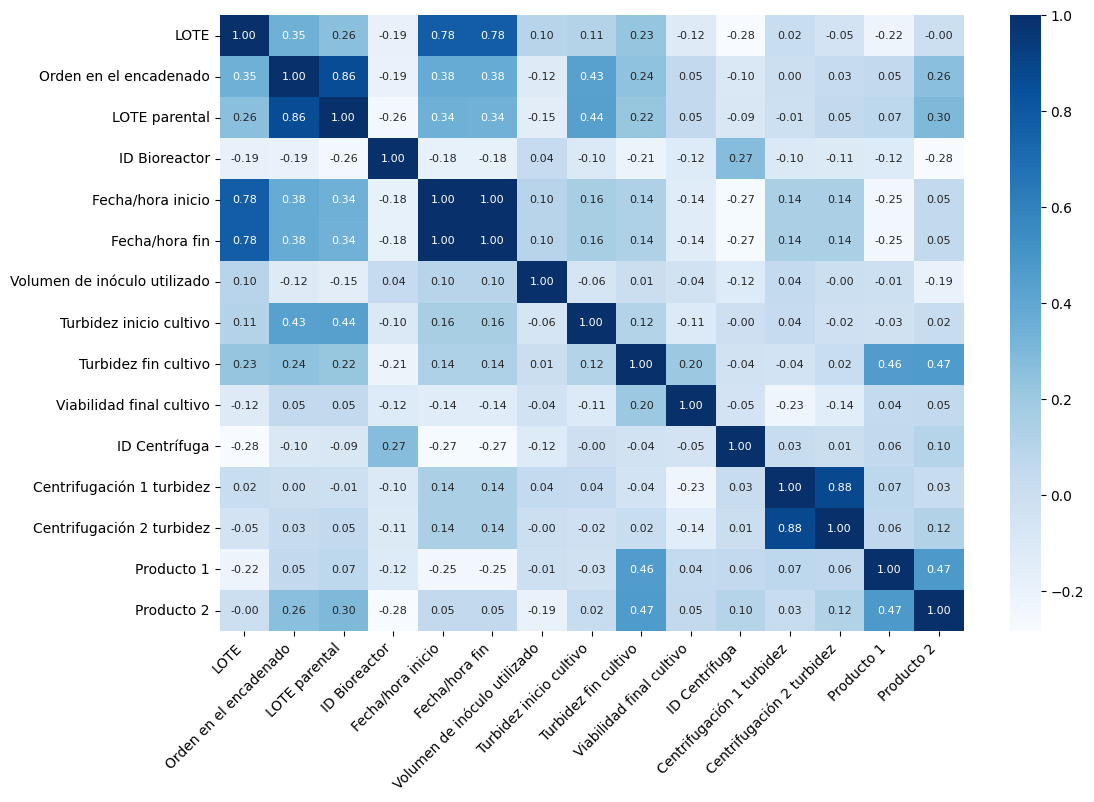

In [21]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Generar el heatmap
sns.heatmap(df_prod_fin.corr(), annot=True, annot_kws={"size": 8}, fmt=".2f", cmap="Blues")

# Rotar las etiquetas del eje X para que no se sobrepongan
plt.xticks(rotation=45, ha="right")

# Mostrar el gráfico
plt.show()

In [20]:
# df_prei_train = pd.read_csv("Datos cultivos productivos\df_prei_train.csv")
# df_prei_train = df_prei_train[["LOTE","Turbidez linea 1","Turbidez linea 2","Turbidez linea 3","PH menor 1","PH menor 2"]]
# df_prei_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LOTE              164 non-null    int64  
 1   Turbidez linea 1  162 non-null    float64
 2   Turbidez linea 2  151 non-null    float64
 3   Turbidez linea 3  134 non-null    float64
 4   PH menor 1        161 non-null    float64
 5   PH menor 2        161 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 7.8 KB


In [21]:
# df_prod_fin_cin_fin_cin_ino_prei_train = pd.merge(df_prod_fin_cin_fin_cin_ino, df_prei_train, left_on="LOTE",right_on="LOTE", how='left')
# df_prod_fin_cin_fin_cin_ino_prei_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   LOTE                          153 non-null    int64         
 1   Orden en el encadenado        153 non-null    int64         
 2   LOTE parental                 153 non-null    float64       
 3   ID Bioreactor                 153 non-null    int64         
 4   Fecha/hora inicio             153 non-null    datetime64[ns]
 5   Fecha/hora fin                153 non-null    datetime64[ns]
 6   Volumen de inóculo utilizado  153 non-null    float64       
 7   Turbidez inicio cultivo       153 non-null    float64       
 8   Turbidez fin cultivo          153 non-null    float64       
 9   Viabilidad final cultivo      153 non-null    float64       
 10  ID Centrífuga                 153 non-null    int64         
 11  Centrifugación 1 turbidez     15

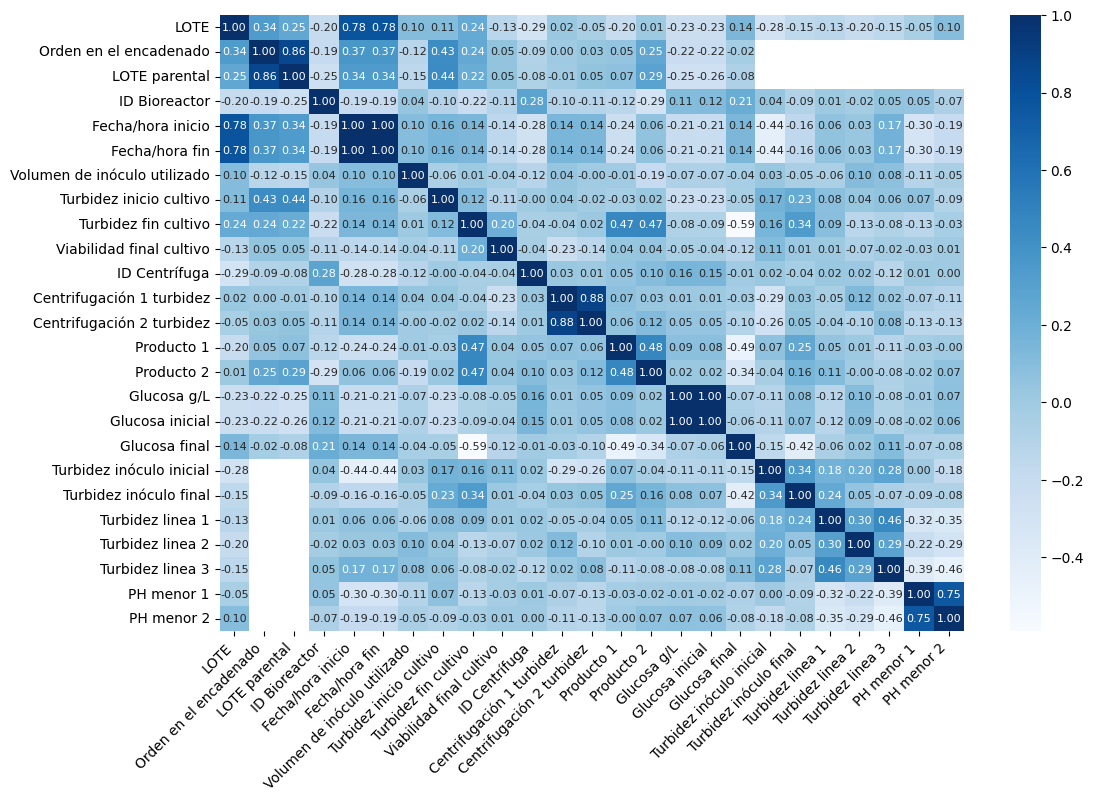

In [22]:
# # Ajustar el tamaño de la figura
# plt.figure(figsize=(12, 8))

# # Generar el heatmap
# sns.heatmap(df_prod_fin_cin_fin_cin_ino_prei_train.corr(), annot=True, annot_kws={"size": 8}, fmt=".2f", cmap="Blues")

# # Rotar las etiquetas del eje X para que no se sobrepongan
# plt.xticks(rotation=45, ha="right")

# # Mostrar el gráfico
# plt.show()

In [23]:
df_prod_fin_cin_fin_cin_ino_prei_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   LOTE                          153 non-null    int64         
 1   Orden en el encadenado        153 non-null    int64         
 2   LOTE parental                 153 non-null    float64       
 3   ID Bioreactor                 153 non-null    int64         
 4   Fecha/hora inicio             153 non-null    datetime64[ns]
 5   Fecha/hora fin                153 non-null    datetime64[ns]
 6   Volumen de inóculo utilizado  153 non-null    float64       
 7   Turbidez inicio cultivo       153 non-null    float64       
 8   Turbidez fin cultivo          153 non-null    float64       
 9   Viabilidad final cultivo      153 non-null    float64       
 10  ID Centrífuga                 153 non-null    int64         
 11  Centrifugación 1 turbidez     15

In [311]:
df_temp_test = pd.read_csv("resultado_inicios_y_finales_con_todo_test.csv")
df_temp_test = df_temp_test.drop(["Fecha/hora inicio","Fecha/hora fin"],axis="columns")
df_temp_test["LOTE"] = df_prod_test["LOTE"]
df_temp_test

,Temperatura almacén principal (inicio),Humedad almacén principal (inicio),Temperatura almacén producción (inicio),Humedad almacén producción (inicio),Temperatura almacén principal (fin),Humedad almacén principal (fin),Temperatura almacén producción (fin),Humedad almacén producción (fin),Temperatura biorreactores (inicio),Humedad biorreactores (inicio),Temperatura biorreactores (fin),Humedad biorreactores (fin),Temperatura centrifugas (inicio),Humedad centrifugas (inicio),Temperatura centrifugas (fin),Humedad centrifugas (fin),LOTE
0,21.310761,43.371384,20.222149,48.021557,21.419273,44.177952,20.426504,51.258678,20.261416,48.765892,22.441786,51.059224,19.742541,46.982755,21.604432,50.034393,24054
1,20.225693,44.988136,20.354166,45.732059,19.708473,41.924622,20.086515,45.193142,20.215202,47.053615,21.633854,39.436527,19.908392,44.201006,21.106817,37.002895,24055
2,20.225693,44.988136,20.354166,45.732059,19.708473,41.924622,20.086515,45.193142,20.215202,47.053615,21.633854,39.436527,19.908392,44.201006,21.106817,37.002895,24056
3,21.310761,43.371384,20.222149,48.021557,21.676071,43.371384,20.426504,51.938656,20.261416,48.765892,22.574454,49.087876,19.742541,46.982755,22.038942,47.117565,24057
4,21.003326,43.136284,20.086515,47.757523,22.594765,41.609955,20.359592,52.343750,19.527471,50.741293,19.295901,50.921934,19.536425,49.062787,21.212922,44.137089,24058
5,21.003326,43.136284,20.086515,47.757523,22.594765,41.609955,20.359592,52.343750,19.527471,50.741293,19.295901,50.921934,19.536425,49.062787,21.212922,44.137089,24059
6,22.862412,40.546585,19.755569,45.862267,20.088249,42.709492,20.354166,47.077545,22.497462,39.829708,22.222054,43.028046,19.353313,43.272194,19.072542,47.129734,24060
7,22.862412,40.546585,19.755569,45.862267,20.088249,42.709492,20.354166,47.077545,22.497462,39.829708,22.222054,43.028046,19.353313,43.272194,19.072542,47.129734,24061
8,22.663483,42.141636,20.355974,50.860821,20.359520,33.714264,19.815248,41.134983,21.927260,45.131744,22.117827,27.111006,20.605722,46.879830,21.245337,26.333761,24062
9,20.898438,35.450136,20.003326,39.785877,20.496963,37.591579,20.019604,40.770227,22.258675,30.329294,19.914854,42.173527,21.550646,28.937651,21.526230,37.385174,24063


In [310]:
df_temp = pd.read_csv("resultado_inicios_y_finales_con_todo_train.csv")
df_temp = df_temp.drop(["Fecha/hora inicio","Fecha/hora fin"],axis="columns")
df_temp["LOTE"] = df_prod_fin_cin_fin_cin_ino["LOTE"]
df_temp

,Temperatura almacén principal (inicio),Humedad almacén principal (inicio),Temperatura almacén producción (inicio),Humedad almacén producción (inicio),Temperatura almacén principal (fin),Humedad almacén principal (fin),Temperatura almacén producción (fin),Humedad almacén producción (fin),Temperatura biorreactores (inicio),Humedad biorreactores (inicio),Temperatura biorreactores (fin),Humedad biorreactores (fin),Temperatura centrifugas (inicio),Humedad centrifugas (inicio),Temperatura centrifugas (fin),Humedad centrifugas (fin),LOTE
0,20.609085,35.333641,20.137079,50.868053,19.701241,42.827690,20.203993,52.759693,20.769315,42.575630,20.519910,49.922036,19.750283,43.381756,20.761100,49.984621,23019
1,20.609085,35.333641,20.137079,50.868053,19.701241,42.827690,20.203993,52.759693,20.769315,42.575630,20.519910,49.922036,19.750283,43.381756,20.761100,49.984621,23020
2,20.475258,36.642796,20.001446,52.358215,20.355904,32.895251,20.251013,49.515335,22.340484,40.619897,18.877224,42.477821,18.655607,46.747024,19.002116,40.868383,23021
3,20.475258,36.642796,20.001446,52.358215,20.355904,32.895251,20.251013,49.515335,22.340484,40.619897,18.877224,42.477821,18.655607,46.747024,19.002116,40.868383,23022
4,20.546243,34.780090,20.341434,49.782986,19.199073,34.300638,19.797092,47.630932,20.951063,41.009770,18.944965,47.147298,18.460646,44.969654,18.655964,47.595199,23023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,21.292679,43.110966,19.609085,52.224392,22.457321,41.613571,20.355974,52.343750,19.042997,56.716159,20.334065,54.099913,19.759992,52.699882,21.233287,49.815365,24049
148,22.066696,42.007812,20.086515,51.804832,22.728584,40.929977,20.223957,51.674622,22.336437,50.637980,21.649652,47.952069,20.245257,54.090889,21.129045,46.822657,24050
149,22.066696,42.007812,20.086515,51.804832,22.710503,42.004196,20.223957,51.808449,22.336437,50.637980,20.568031,51.620970,20.245257,54.090889,18.548282,54.244526,24051
150,23.372398,42.441841,20.223957,46.223740,19.448059,37.197338,19.746527,44.696950,19.265977,59.204502,18.946753,37.797011,19.923050,55.781724,18.336776,36.823635,24052


In [312]:
df_prod_test_temp = pd.merge(df_prod_test,df_temp_test, left_on="LOTE", right_on="LOTE",how="right")
df_prod_test_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 32 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   LOTE                                     56 non-null     int64         
 1   Orden en el encadenado                   56 non-null     int64         
 2   LOTE parental                            22 non-null     float64       
 3   ID Bioreactor                            56 non-null     int64         
 4   Fecha/hora inicio                        56 non-null     datetime64[ns]
 5   Fecha/hora fin                           56 non-null     datetime64[ns]
 6   Volumen de inóculo utilizado             43 non-null     float64       
 7   Turbidez inicio cultivo                  55 non-null     float64       
 8   Turbidez fin cultivo                     55 non-null     float64       
 9   Viabilidad inicial cultivo               55 n

In [201]:
df_prod_fin_temp = pd.merge(df_prod_fin,df_temp, left_on="LOTE", right_on="LOTE",how="right")
df_prod_fin_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   LOTE                                     152 non-null    int64         
 1   Orden en el encadenado                   152 non-null    int64         
 2   LOTE parental                            152 non-null    int64         
 3   ID Bioreactor                            152 non-null    int64         
 4   Fecha/hora inicio                        152 non-null    datetime64[ns]
 5   Fecha/hora fin                           152 non-null    datetime64[ns]
 6   Volumen de inóculo utilizado             152 non-null    float64       
 7   Turbidez inicio cultivo                  152 non-null    float64       
 8   Turbidez fin cultivo                     152 non-null    float64       
 9   Viabilidad final cultivo                 15

In [23]:
df_prod_fin_cin_fin_cin_ino_prei_train_temp = pd.merge(df_prod_fin_cin_fin_cin_ino,df_temp, left_on="LOTE", right_on="LOTE",how="right")
df_prod_fin_cin_fin_cin_ino_prei_train_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   LOTE                                     152 non-null    int64         
 1   Orden en el encadenado                   152 non-null    int64         
 2   LOTE parental                            152 non-null    int64         
 3   ID Bioreactor                            152 non-null    int64         
 4   Fecha/hora inicio                        152 non-null    datetime64[ns]
 5   Fecha/hora fin                           152 non-null    datetime64[ns]
 6   Volumen de inóculo utilizado             152 non-null    float64       
 7   Turbidez inicio cultivo                  152 non-null    float64       
 8   Turbidez fin cultivo                     152 non-null    float64       
 9   Viabilidad final cultivo                 15

In [24]:
df_prod_fin_cin_fin_cin_ino_prei_train_temp["Orden en el encadenado"] = df_prod_fin_cin_fin_cin_ino_prei_train_temp["Orden en el encadenado"].fillna(0)
df_prod_fin_cin_fin_cin_ino_prei_train_temp["LOTE parental"] = df_prod_fin_cin_fin_cin_ino_prei_train_temp["LOTE parental"].fillna(0)

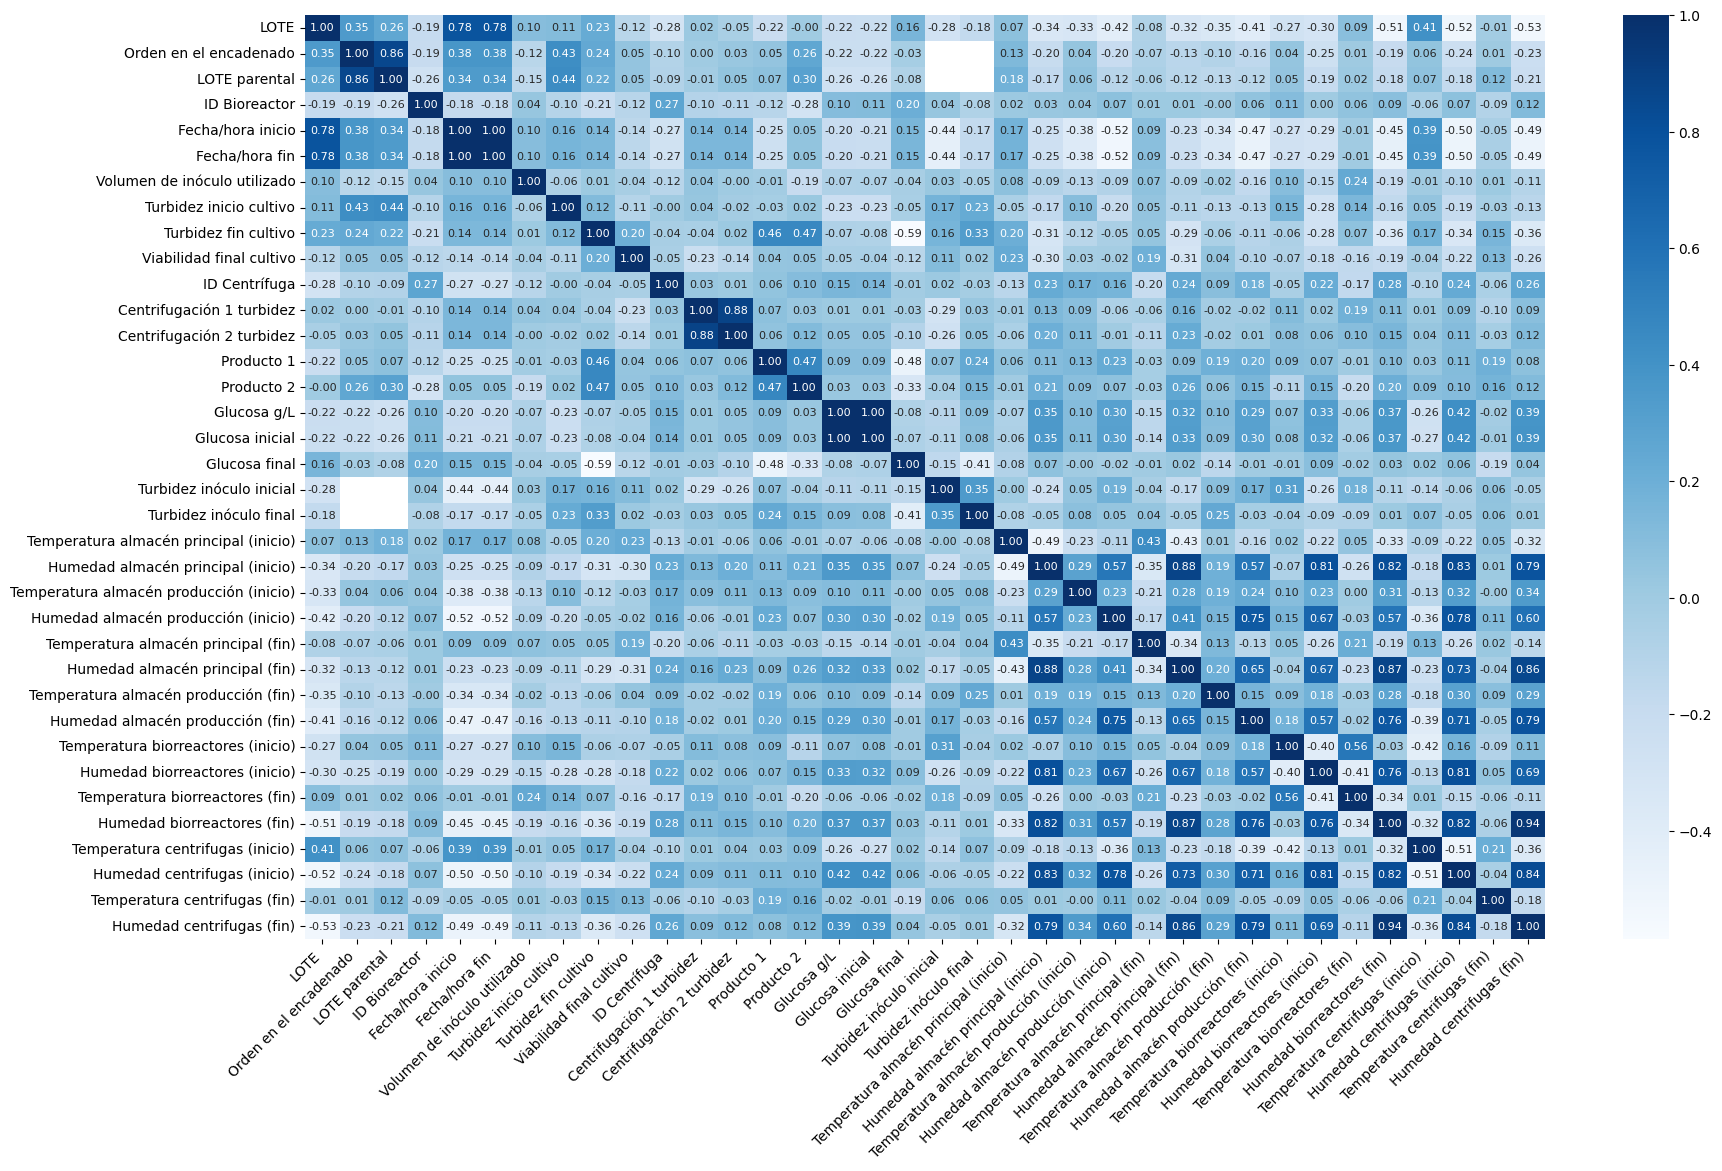

In [25]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(20, 12))

# Generar el heatmap
sns.heatmap(df_prod_fin_cin_fin_cin_ino_prei_train_temp.corr(), annot=True, annot_kws={"size": 8}, fmt=".2f", cmap="Blues")

# Rotar las etiquetas del eje X para que no se sobrepongan
plt.xticks(rotation=45, ha="right")

# Mostrar el gráfico
plt.show()

In [26]:
df_prod_fin_cin_fin_cin_ino_prei_train_temp["Glucosa g/L"] = df_prod_fin_cin_fin_cin_ino_prei_train_temp["Glucosa g/L"].fillna(0)
df_prod_fin_cin_fin_cin_ino_prei_train_temp["Glucosa inicial"] = df_prod_fin_cin_fin_cin_ino_prei_train_temp["Glucosa inicial"].fillna(0)
df_prod_fin_cin_fin_cin_ino_prei_train_temp["Glucosa final"] = df_prod_fin_cin_fin_cin_ino_prei_train_temp["Glucosa final"].fillna(0)
df_prod_fin_cin_fin_cin_ino_prei_train_temp["Turbidez inóculo inicial"] = df_prod_fin_cin_fin_cin_ino_prei_train_temp["Turbidez inóculo inicial"].fillna(0)
df_prod_fin_cin_fin_cin_ino_prei_train_temp["Turbidez inóculo final"] = df_prod_fin_cin_fin_cin_ino_prei_train_temp["Turbidez inóculo final"].fillna(0)
# df_prod_fin_cin_fin_cin_ino_prei_train_temp["Turbidez linea 1"] = df_prod_fin_cin_fin_cin_ino_prei_train_temp["Turbidez linea 1"].fillna(0)
# df_prod_fin_cin_fin_cin_ino_prei_train_temp["Turbidez linea 2"] = df_prod_fin_cin_fin_cin_ino_prei_train_temp["Turbidez linea 2"].fillna(0)
# df_prod_fin_cin_fin_cin_ino_prei_train_temp["Turbidez linea 3"] = df_prod_fin_cin_fin_cin_ino_prei_train_temp["Turbidez linea 3"].fillna(0)
# df_prod_fin_cin_fin_cin_ino_prei_train_temp["PH menor 1"] = df_prod_fin_cin_fin_cin_ino_prei_train_temp["PH menor 1"].fillna(0)
# df_prod_fin_cin_fin_cin_ino_prei_train_temp["PH menor 2"] = df_prod_fin_cin_fin_cin_ino_prei_train_temp["PH menor 2"].fillna(0)
df_prod_fin_cin_fin_cin_ino_prei_train_temp["Temperatura almacén principal (inicio)"] = df_prod_fin_cin_fin_cin_ino_prei_train_temp["Temperatura almacén principal (inicio)"].fillna(0)
df_prod_fin_cin_fin_cin_ino_prei_train_temp["Humedad almacén principal (inicio)"] = df_prod_fin_cin_fin_cin_ino_prei_train_temp["Humedad almacén principal (inicio)"].fillna(0)
df_prod_fin_cin_fin_cin_ino_prei_train_temp["Temperatura almacén producción (inicio)"] = df_prod_fin_cin_fin_cin_ino_prei_train_temp["Temperatura almacén producción (inicio)"].fillna(0)
df_prod_fin_cin_fin_cin_ino_prei_train_temp["Temperatura almacén principal (fin)"] = df_prod_fin_cin_fin_cin_ino_prei_train_temp["Temperatura almacén principal (fin)"].fillna(0)
df_prod_fin_cin_fin_cin_ino_prei_train_temp["Humedad almacén principal (fin)"] = df_prod_fin_cin_fin_cin_ino_prei_train_temp["Humedad almacén principal (fin)"].fillna(0)
df_prod_fin_cin_fin_cin_ino_prei_train_temp["Temperatura almacén producción (fin)"] = df_prod_fin_cin_fin_cin_ino_prei_train_temp["Temperatura almacén producción (fin)"].fillna(0)
df_prod_fin_cin_fin_cin_ino_prei_train_temp["Humedad almacén producción (fin)"] = df_prod_fin_cin_fin_cin_ino_prei_train_temp["Humedad almacén producción (fin)"].fillna(0)



In [26]:
df_prod_fin_cin_fin_cin_ino_prei_train_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   LOTE                                     152 non-null    int64         
 1   Orden en el encadenado                   152 non-null    int64         
 2   LOTE parental                            152 non-null    float64       
 3   ID Bioreactor                            152 non-null    int64         
 4   Fecha/hora inicio                        152 non-null    datetime64[ns]
 5   Fecha/hora fin                           152 non-null    datetime64[ns]
 6   Volumen de inóculo utilizado             152 non-null    float64       
 7   Turbidez inicio cultivo                  152 non-null    float64       
 8   Turbidez fin cultivo                     152 non-null    float64       
 9   Viabilidad final cultivo                 15

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import linear_model, metrics, model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [354]:
X = df_prod_test_temp.drop(['Producto 1','Orden en el encadenado','ID Centrífuga','Viabilidad final cultivo','LOTE parental','Producto 2','Fecha/hora inicio','Fecha/hora fin'],axis='columns')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   LOTE                                     56 non-null     int64  
 1   ID Bioreactor                            56 non-null     int64  
 2   Volumen de inóculo utilizado             43 non-null     float64
 3   Turbidez inicio cultivo                  55 non-null     float64
 4   Turbidez fin cultivo                     55 non-null     float64
 5   Viabilidad inicial cultivo               55 non-null     float64
 6   Centrifugación 1 turbidez                56 non-null     float64
 7   Centrifugación 2 turbidez                56 non-null     float64
 8   Temperatura almacén principal (inicio)   56 non-null     float64
 9   Humedad almacén principal (inicio)       56 non-null     float64
 10  Temperatura almacén producción (inicio)  56 non-null

In [281]:
# X = df_prod_fin_cin_fin_cin_ino_prei_train_temp.drop(['Producto 1','Centrifugación 2 turbidez','Temperatura almacén principal (inicio)','ID Centrífuga','Orden en el encadenado','Temperatura centrifugas (inicio)','Viabilidad final cultivo','Turbidez inóculo inicial','Turbidez inóculo final','Glucosa inicial','Temperatura biorreactores (fin)','Volumen de inóculo utilizado','Turbidez inicio cultivo','ID Bioreactor','Temperatura almacén principal (fin)','Glucosa final','Glucosa g/L','Producto 2', 'Fecha/hora inicio','Fecha/hora fin'],axis='columns')
# X.info()

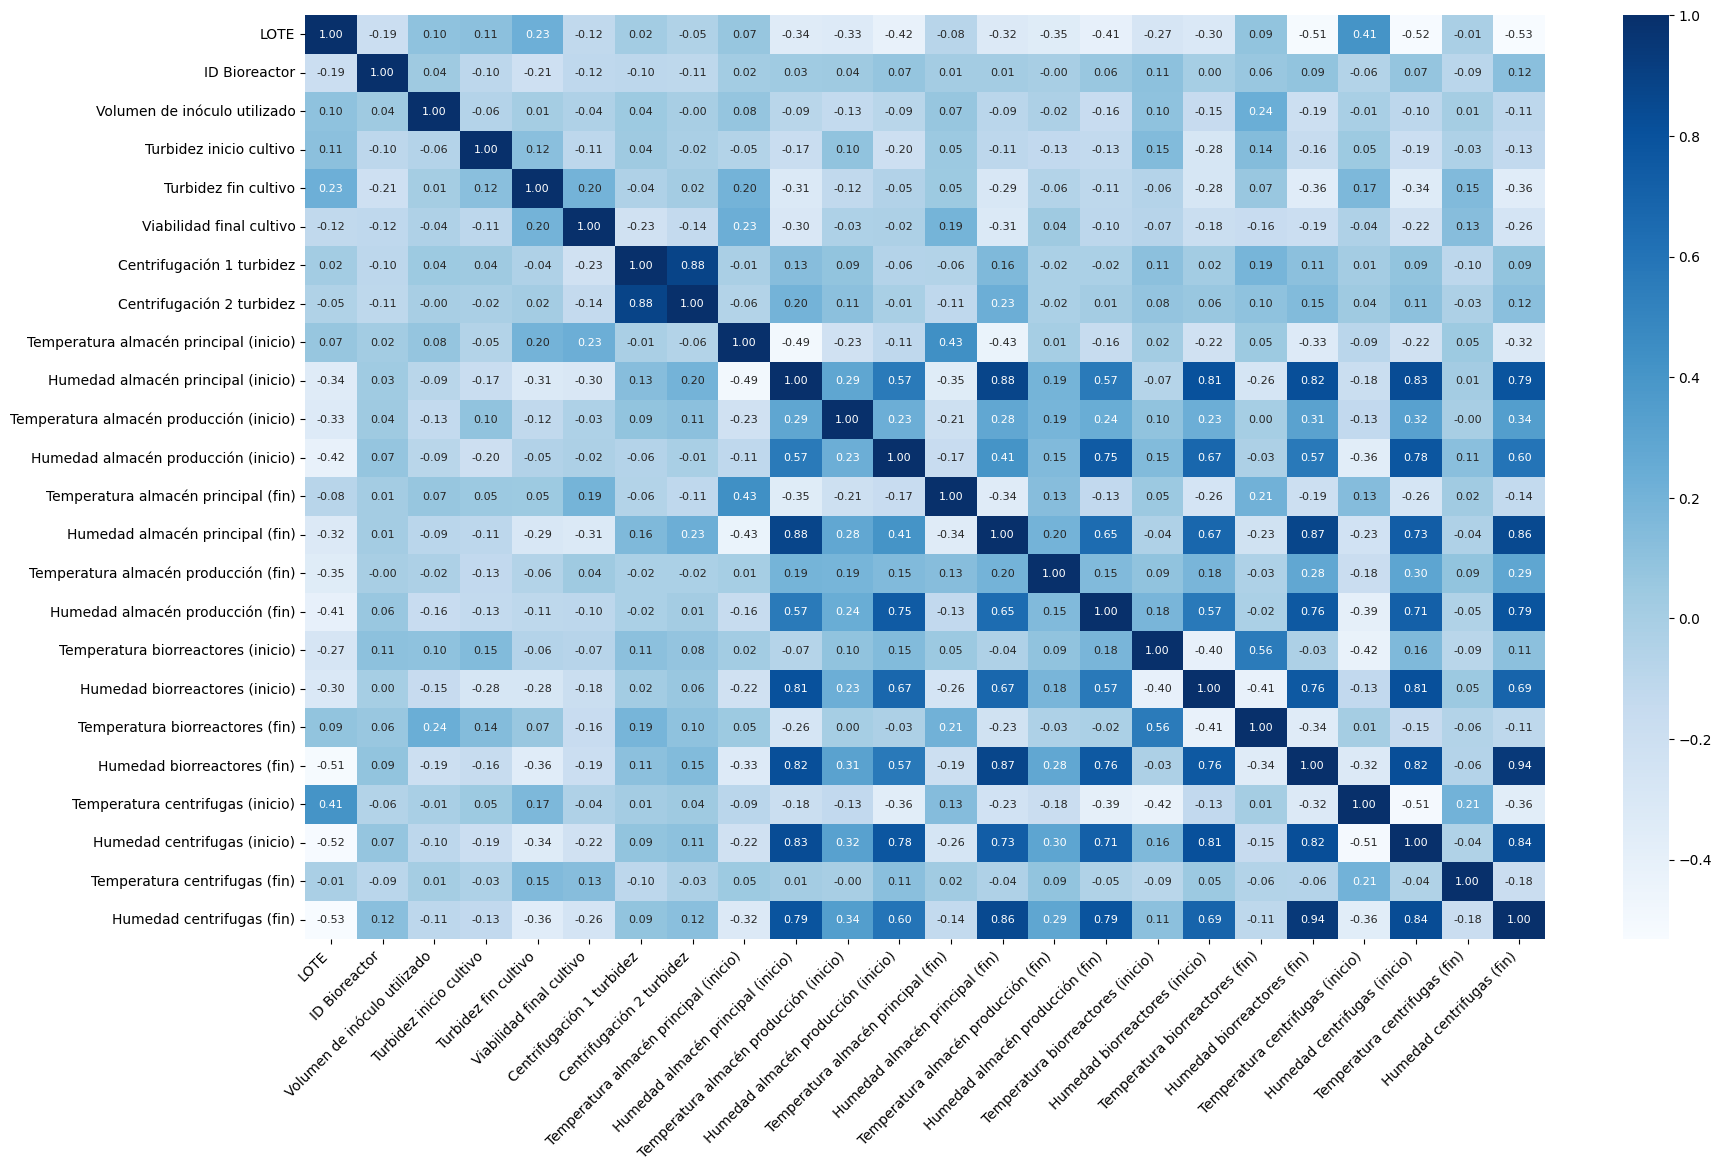

In [282]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(20, 12))

# Generar el heatmap
sns.heatmap(X.corr(), annot=True, annot_kws={"size": 8}, fmt=".2f", cmap="Blues")

# Rotar las etiquetas del eje X para que no se sobrepongan
plt.xticks(rotation=45, ha="right")

# Mostrar el gráfico
plt.show()

In [283]:
y = df_prod_fin_temp["Producto 1"]
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 152 entries, 0 to 151
Series name: Producto 1
Non-Null Count  Dtype  
--------------  -----  
152 non-null    float64
dtypes: float64(1)
memory usage: 1.3 KB


In [284]:
# y = df_prod_fin_cin_fin_cin_ino_prei_train_temp["Producto 1"]
# y.info()

In [285]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state = 42)

In [315]:
# Usar el StandardScaler para estandarización o MinMaxScaler para normalización
scaler = StandardScaler()  # Alternativamente, usa MinMaxScaler() para valores entre 0 y 1

# Ajustar el escalador en los datos de entrenamiento y transformar
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Viabilidad inicial cultivo


In [317]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Suponiendo que ya tienes tus datos en X e y
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los modelos y los hiperparámetros a ajustar
models = {
    'Linear Regression': LinearRegression(),
    'Elastic Net': ElasticNet(),
    'Random Forest': RandomForestRegressor(random_state=0),
    'XGBRegressor':XGBRegressor(random_state=0)

}

# Hiperparámetros para cada modelo
param_grid = {
    'Linear Regression': {

    },
    'Elastic Net': {
        'alpha': np.logspace(1,2,3),  # Aumenta la regularización
        'l1_ratio': np.linspace(0.1, 0.9, 3)  # Mezcla de penalización L1 y L2
    },
    'Random Forest': {
        'n_estimators': [25,40,50,55,60,65,70,80],  # Menos árboles
        'max_depth': [5,6,7,8,9,10],  # Limitar la profundidad del árbol para simplicidad
        'min_samples_split': [2,4],  # Evitar divisiones pequeñas
        'min_samples_leaf': [2,4],  # Evitar hojas con muy pocos datos

    },
    'XGBRegressor':{
        'max_depth': [1,2,3,4,5,6],
        "learning_rate":[0.015,0.02,0.025,0.03,0.04,0.05],         # Reducir la tasa de aprendizaje para hacer ajustes más lentos
        "n_estimators":[100,150,200,250,300,400],          # Aumentar el número de estimadores
        "subsample":[0.8],              # Usar solo una parte de los datos en cada árbol
        "colsample_bytree":[0.8],       # Usar solo una parte de las características en cada árbol
        "alpha":[0.1],                  # Regularización L1
        "reg_lambda":[1],               # Regularización L2
        "gamma":[1],                     # Para evitar divisiones innecesarias
    }}

# Realizar el Grid Search para cada modelo
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=20, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    best_models[name] = grid_search.best_estimator_
    print(f"{name} Best Parameters: {grid_search.best_params_}")
    print(f"{name} Best CV MSE: {-grid_search.best_score_}")

# Evaluar los modelos en el conjunto de prueba
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)  # Calcular R²
    print(f"{name} Test MSE: {mse}, R²: {r2}, RMSE: {rmse}",y_pred)

Linear Regression Best Parameters: {}
Linear Regression Best CV MSE: 85440.55693389331
Elastic Net Best Parameters: {'alpha': np.float64(10.0), 'l1_ratio': np.float64(0.9)}
Elastic Net Best CV MSE: 85325.4389778355


c:\Users\Victor\miniconda3\envs\Thon_env\lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Random Forest Best Parameters: {'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 60}
Random Forest Best CV MSE: 82864.07265177862
XGBRegressor Best Parameters: {'alpha': 0.1, 'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.03, 'max_depth': 1, 'n_estimators': 300, 'reg_lambda': 1, 'subsample': 0.8}
XGBRegressor Best CV MSE: 80143.5411273484
Linear Regression Test MSE: 47163.30662775453, R²: 0.2956979175755565, RMSE: 217.17114593737938 [1295.31091053 1517.30411553 2018.52391906 1581.98421865 1912.08876347
 1104.12131846 1410.70070189 2116.27783321 1650.73524319 1759.19572798
 1554.0889635  1611.96820429 2078.04070103 1647.38862721 1428.05430592
 1516.1852666  1336.83495542 1864.13705493 1968.5178211  1627.02748289
 1483.34447865 1444.73591249 1569.10934703 1815.5295996  1608.7792547
 1164.13926018 1732.09883095 1704.43172161 1339.78239995 1450.01319772
 1808.92159259]
Elastic Net Test MSE: 39562.13690940467, R²: 0.4092081874077613, RMSE: 198.90233007

# RESULTADOS FINALES

In [355]:
scaler = StandardScaler()  # Alternativamente, usa MinMaxScaler() para valores entre 0 y 1

# Ajustar el escalador en los datos de entrenamiento y transformar
X_test = scaler.fit_transform(X)



In [356]:
len(X_test)

56

In [357]:
y_pred = model.predict(X_test)

In [358]:
len(y_pred)

56

In [361]:
data = y_pred 

In [362]:
df = pd.DataFrame(data, columns=['Valores'])
df

,Valores
0,2010.911865
1,1529.718384
2,1721.567139
3,1730.783936
4,1711.275146
5,1634.552979
6,1674.331543
7,1687.579346
8,1770.106689
9,1427.706909


In [363]:
df_final = df_temp_test["LOTE"]

In [364]:
df_final["Resultados"] = df

C:\Users\Victor\AppData\Local\Temp\ipykernel_15080\1866039049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["Resultados"] = df


In [371]:
df_concat = pd.concat([df_final, df], axis=1)
df_concat = df_concat.iloc[:56,:]
df_concat

,LOTE,Valores
0,24054,2010.911865
1,24055,1529.718384
2,24056,1721.567139
3,24057,1730.783936
4,24058,1711.275146
5,24059,1634.552979
6,24060,1674.331543
7,24061,1687.579346
8,24062,1770.106689
9,24063,1427.706909


In [372]:
df_concat.to_csv("CVC DATA_UH2024.txt",index=False, header=False, sep='|')

# RESULTADOS FINALES

In [341]:
df_final = df_temp_test["LOTE"]


In [136]:
# rf = RandomForestRegressor(n_jobs=-1)
xgb = XGBRegressor(max_depth=1)
xgb.fit(X_train_scaled,y_train)
# rf.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [137]:
predictions = xgb.predict(X_test_scaled)
predictions

array([1350.0951 , 1645.6278 , 1998.7251 , 1626.1787 , 1740.8807 ,
       1287.99   , 1547.8274 , 1952.4275 , 1500.874  , 1686.597  ,
       1986.1973 , 1678.6818 , 1866.8038 , 1538.8624 , 1363.2305 ,
       1534.6472 , 1355.2134 , 1618.114  , 1714.9021 , 1634.285  ,
       1657.9143 , 1454.0935 , 1611.9131 , 1747.391  , 1631.06   ,
       1009.60754, 1904.7346 , 1935.3937 ,  945.7817 , 1662.6135 ,
       1760.046  ], dtype=float32)

In [138]:
score = xgb.score(X_test_scaled,y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

RMSE: 193.94068941843133


In [220]:
x = 0
for n in range(1,15):
    xgb = XGBRegressor(max_depth=n)
    xgb.fit(X_train_scaled,y_train)
    y = xgb.score(X_test_scaled,y_test)
    if y > x:
        x = y
    print(n,x)

1 0.31359709476203157
2 0.31359709476203157
3 0.3243248535031209
4 0.3243248535031209
5 0.35320313756336763
6 0.35320313756336763
7 0.35320313756336763
8 0.35320313756336763
9 0.35320313756336763
10 0.35320313756336763
11 0.35320313756336763
12 0.35320313756336763
13 0.35320313756336763
14 0.35320313756336763


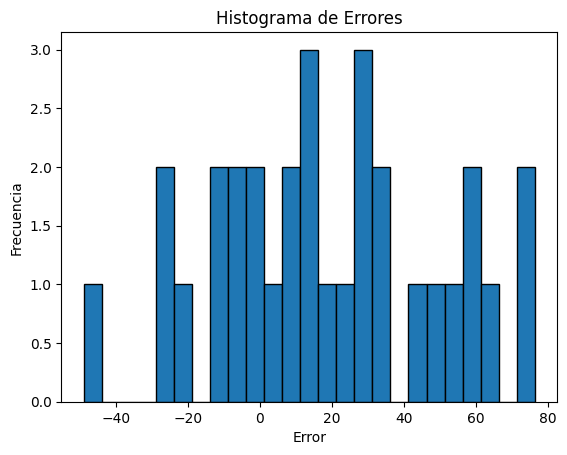

In [89]:
errors = y_test - predictions

plt.hist(errors, bins=25, edgecolor='black')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Histograma de Errores')
plt.show()


# MODELADO

In [150]:
df_prod_fin = df_prod_fin.drop(["Fecha/hora inicio","Fecha/hora fin","Producto 2"],axis="columns")
df_prod_fin.fillna(0)
df_prod_fin

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1
0,23019,1,0.0,14615,82.4,17.3,91.2,184000000.0,17825,0.0,0.0,1747.9
1,23020,1,0.0,14616,80.4,18.8,91.2,182000000.0,14246,0.0,0.0,1676.2
2,23021,1,0.0,13170,66.4,16.2,86.4,248000000.0,17825,0.0,0.0,1928.5
3,23022,1,0.0,14614,85.6,18.5,83.2,230000000.0,12912,0.0,0.0,1782.8
4,23023,1,0.0,14615,77.6,17.1,74.4,133000000.0,17825,26.6,20.9,1861.8
5,23024,1,0.0,14616,76.0,16.6,80.8,199000000.0,14246,24.6,10.4,2161.1
6,23025,1,0.0,13170,77.2,17.8,87.2,199000000.0,17825,30.6,29.4,2044.7
7,23026,1,0.0,14614,78.8,18.2,81.2,206000000.0,14246,26.5,11.6,2263.2
8,23027,1,0.0,14615,83.2,16.9,68.1,195000000.0,14246,26.2,9.8,1407.7
9,23028,1,0.0,14616,83.6,18.6,67.2,176000000.0,17825,27.3,12.2,1373.2


In [146]:
X = df_prod_fin.drop(["Producto 1"],axis='columns')
y = df_prod_fin["Producto 1"]    

In [151]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Suponiendo que ya tienes tus datos en X e y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los modelos y los hiperparámetros a ajustar
models = {
    'Linear Regression': LinearRegression(),
    'Elastic Net': ElasticNet(),
    'Random Forest': RandomForestRegressor()
}

# Hiperparámetros para cada modelo
param_grid = {
    'Linear Regression': {},
    'Elastic Net': {'alpha': np.logspace(-3, 3, 7), 'l1_ratio': np.linspace(0, 1, 5)},
    'Random Forest': {'n_estimators': [50, 100], 'max_depth': [3], 'min_samples_split': [2, 5]}
}

# Realizar el Grid Search para cada modelo
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_models[name] = grid_search.best_estimator_
    print(f"{name} Best Parameters: {grid_search.best_params_}")
    print(f"{name} Best CV MSE: {-grid_search.best_score_}")

# Evaluar los modelos en el conjunto de prueba
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)  # Calcular R²
    print(f"{name} Test MSE: {mse}, R²: {r2}")

Linear Regression Best Parameters: {}
Linear Regression Best CV MSE: 97517.49027316875
Elastic Net Best Parameters: {'alpha': np.float64(100.0), 'l1_ratio': np.float64(1.0)}
Elastic Net Best CV MSE: 90071.51307838634
Random Forest Best Parameters: {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Best CV MSE: 93275.40458971998
Linear Regression Test MSE: 50530.76346494065, R²: 0.245410797513688
Elastic Net Test MSE: 50146.657329768575, R²: 0.2511467556179168
Random Forest Test MSE: 46467.735307621384, R²: 0.3060850673382113


In [193]:
df_prod_fin_cin_fin_cin_ino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   LOTE                          152 non-null    int64         
 1   Orden en el encadenado        152 non-null    int64         
 2   LOTE parental                 152 non-null    float64       
 3   ID Bioreactor                 152 non-null    int64         
 4   Fecha/hora inicio             152 non-null    datetime64[ns]
 5   Fecha/hora fin                152 non-null    datetime64[ns]
 6   Volumen de inóculo utilizado  152 non-null    float64       
 7   Turbidez inicio cultivo       152 non-null    float64       
 8   Turbidez fin cultivo          152 non-null    float64       
 9   Viabilidad final cultivo      152 non-null    float64       
 10  ID Centrífuga                 152 non-null    int64         
 11  Centrifugación 1 turbidez     15

In [194]:
df_prod_fin_cin_fin_cin_ino = df_prod_fin_cin_fin_cin_ino.drop(["LOTE","Orden en el encadenado","LOTE parental","ID Bioreactor","Fecha/hora inicio","Fecha/hora fin","Producto 2"],axis="columns")
df_prod_fin_cin_fin_cin_ino = df_prod_fin_cin_fin_cin_ino.fillna(0)

In [178]:
df_prod_fin_cin_fin_cin_ino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Orden en el encadenado        152 non-null    int64  
 1   LOTE parental                 152 non-null    float64
 2   ID Bioreactor                 152 non-null    int64  
 3   Volumen de inóculo utilizado  152 non-null    float64
 4   Turbidez inicio cultivo       152 non-null    float64
 5   Turbidez fin cultivo          152 non-null    float64
 6   Viabilidad final cultivo      152 non-null    float64
 7   ID Centrífuga                 152 non-null    int64  
 8   Centrifugación 1 turbidez     152 non-null    float64
 9   Centrifugación 2 turbidez     152 non-null    float64
 10  Producto 1                    152 non-null    float64
 11  Glucosa g/L                   152 non-null    float64
 12  Glucosa inicial               152 non-null    float64
 13  Gluco

In [175]:
df_prod_fin_cin_fin_cin_ino = df_prod_fin_cin_fin_cin_ino.fillna(0)

In [179]:
df_prod_fin_cin_fin_cin_ino = df_prod_fin_cin_fin_cin_ino.drop("Glucosa final",axis="columns")

In [195]:
X = df_prod_fin_cin_fin_cin_ino.drop(["Producto 1"],axis='columns')
y = df_prod_fin_cin_fin_cin_ino["Producto 1"] 


In [196]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# # Suponiendo que ya tienes tus datos en X e y
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Definir los modelos y los hiperparámetros a ajustar
# models = {
#     'Linear Regression': LinearRegression(),
#     'Elastic Net': ElasticNet(),
#     'Random Forest': RandomForestRegressor()
# }

# # Hiperparámetros para cada modelo
# param_grid = {
#     'Linear Regression': {},
#     'Elastic Net': {'alpha': np.logspace(-3, 3, 7), 'l1_ratio': np.linspace(0, 1, 5)},
#     'Random Forest': {'n_estimators': [50, 100], 'max_depth': [3], 'min_samples_split': [2, 5]}
# }

# # Realizar el Grid Search para cada modelo
# best_models = {}
# for name, model in models.items():
#     grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
#     grid_search.fit(X_train, y_train)
    
#     best_models[name] = grid_search.best_estimator_
#     print(f"{name} Best Parameters: {grid_search.best_params_}")
#     print(f"{name} Best CV MSE: {-grid_search.best_score_}")

# # Evaluar los modelos en el conjunto de prueba
# for name, model in best_models.items():
#     y_pred = model.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)  # Calcular R²
#     print(f"{name} Test MSE: {mse}, R²: {r2}")

Linear Regression Best Parameters: {}
Linear Regression Best CV MSE: 96612.69400459745
Elastic Net Best Parameters: {'alpha': np.float64(100.0), 'l1_ratio': np.float64(1.0)}
Elastic Net Best CV MSE: 86190.59032109252
Random Forest Best Parameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Best CV MSE: 93000.13271337748
Linear Regression Test MSE: 50968.68768411466, R²: 0.23887115978339257
Elastic Net Test MSE: 49616.12452212147, R²: 0.2590693417963942
Random Forest Test MSE: 40922.07972860892, R²: 0.3888998030295533


In [152]:
xgb = XGBRegressor(max_depth=1)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [153]:
predictions = xgb.predict(X_test)
predictions

array([1479.2595, 1608.7843, 1838.401 , 1754.4822, 1814.1547, 1729.7684,
       1630.9613, 1907.728 , 1569.9039, 1574.6974, 1806.0073, 1582.577 ,
       1763.9542, 1538.8523, 1309.4639, 1581.5765, 1614.743 , 1693.702 ,
       1869.9037, 1795.074 , 1564.9794, 1304.0109, 1512.6903, 1624.871 ,
       1513.5901, 1381.8954, 1774.5992, 1783.4824, 1674.1477, 1367.268 ,
       1701.3259], dtype=float32)

In [154]:
# METRICAS DE TEST, LAS BUENAS, HACEOS LA PREGUNTA: QUE TAL LO ESTAMOS HACIENDO?
print('MAE test', mean_absolute_error(y_test, predictions))
print('MAPE test', mean_absolute_percentage_error(y_test, predictions))
print('MSE test', mean_squared_error(y_test, predictions))# si esto
print('RMSE test', np.sqrt(mean_squared_error(y_test, predictions)))# y esto se parece, fallo mucho, por poco, si no se parecen, fallo mucho, pocas veces
print('R2 score test', r2_score(y_test, predictions))# porcentual de aciertos

MAE test 170.06926663306453
MAPE test 0.11307932532984435
MSE test 46691.83915194142
RMSE test 216.0829450742039
R2 score test 0.30273846559377293


In [155]:
x = 0
for n in range(1,10):
    xgb = XGBRegressor(max_depth=n)
    xgb.fit(X_train,y_train)
    predictions = xgb.predict(X_test)
    y = r2_score(y_test, predictions)
    print(n,y)

1 0.30273846559377293
2 0.25716829506951167
3 0.3459196434950541
4 0.4063998002086705
5 0.30115201858419105
6 0.1307022424428499
7 0.2686772381656418
8 0.3129483553509551
9 0.229872514493357


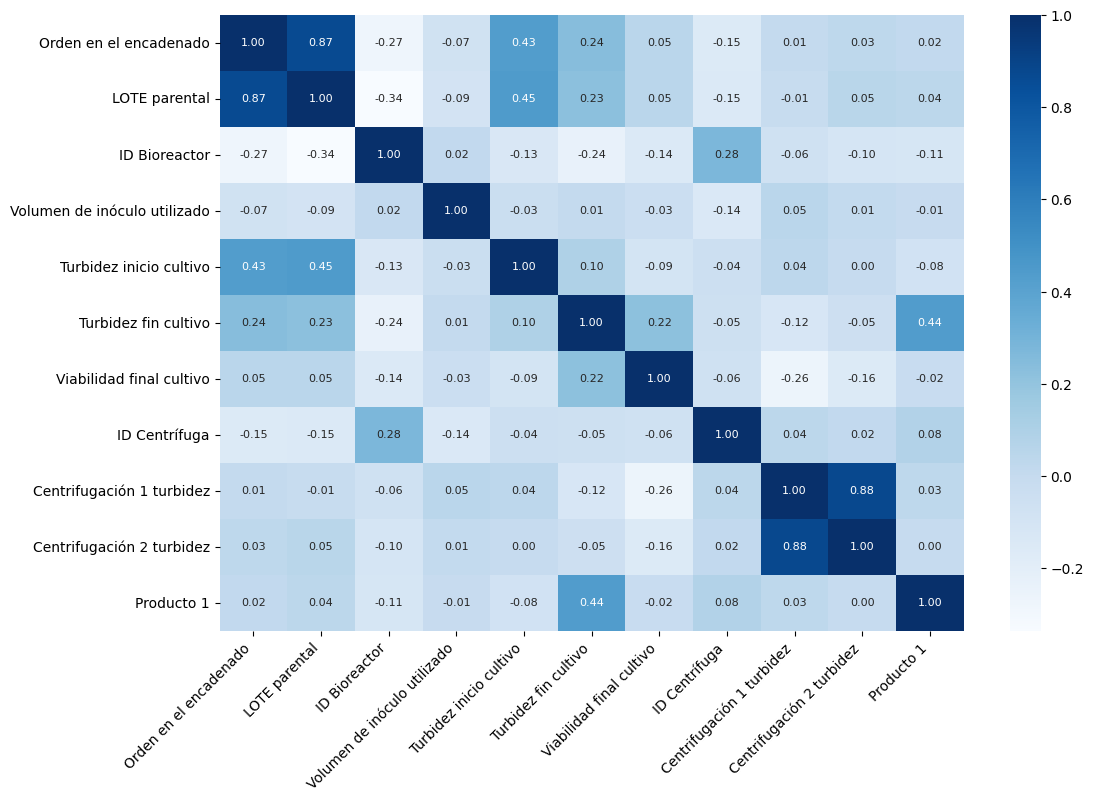

In [124]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Generar el heatmap
sns.heatmap(df_final.corr(), annot=True, annot_kws={"size": 8}, fmt=".2f", cmap="Blues")

# Rotar las etiquetas del eje X para que no se sobrepongan
plt.xticks(rotation=45, ha="right")

# Mostrar el gráfico
plt.show()